In [97]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed
# import sys
# !conda list Check the packages installed

In [69]:
raw_data=pd.read_csv("Logistic Regression Dummy Data v3.csv")

In [70]:
print(raw_data.head())
raw_data.shape

  Type of Account Account History      Reason for the Loan  Loan Amount  \
0         No Data        critical  Learning / Edu purposes       2116.0   
1         No Data        critical                       TV       2438.0   
2         No Data        critical         Buying a New Car       2144.0   
3         No Data        critical           Home furniture       2073.0   
4         No Data        critical     Support for Business       1276.0   

  Account Savings Employment History Individual Stauts Other Loans  \
0           0-200          5-7 Years              Male          No   
1         No Data           7+ Years              Male          No   
2           0-200          2-5 Years              Male          No   
3         No Data          2-5 Years           Married          No   
4         No Data           7+ Years              Male          No   

    Security / Collateral   Age Residence Status            Job  \
0  Property - Real Estate  47.0      House Owner       Servic

(1006, 14)

In [71]:
raw_data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [72]:
# if we want to see a specific column 
raw_data[raw_data["Employment History"].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# delete all the all rows
raw_data=raw_data.dropna(subset=["Employment History"])
raw_data.shape

(1001, 14)

In [74]:
for column in raw_data:
    unique_value=np.unique(raw_data[column])
    nr_value= len(unique_value)
    if nr_value<10:
        print("the number of values for feature {} is: {} -- {}".format(column,nr_value,unique_value))
    else: 
        print("the number of values for feature {} is: {}".format(column,nr_value))

the number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
the number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
the number of values for feature Reason for the Loan is: 10
the number of values for feature Loan Amount is: 911
the number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
the number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
the number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
the number of values for feature Other Loans is: 2 -- ['No' 'Yes']
the number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estate' 'Savings Account' 'Vehicle']
the number of values for feature Age is: 57
the number of values for feature Residence Status is: 3 -- ['Free' 'House Owner' 'Renting']
the number o

In [10]:
g=sns.pairplot(raw_data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7868a465e0> (for post_execute):


KeyboardInterrupt: 

In [75]:
#raw_data[raw_data["Age"]>100]
# subset the data
raw_data=raw_data[raw_data["Age"]<100]

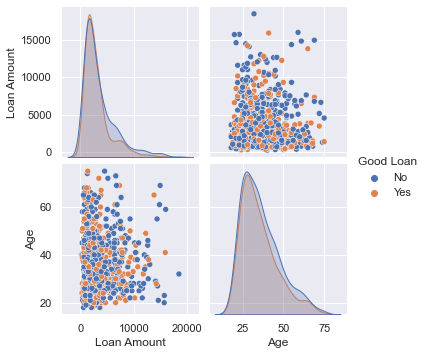

In [15]:
g=sns.pairplot(raw_data, hue="Good Loan")

<AxesSubplot:xlabel='Good Loan', ylabel='count'>

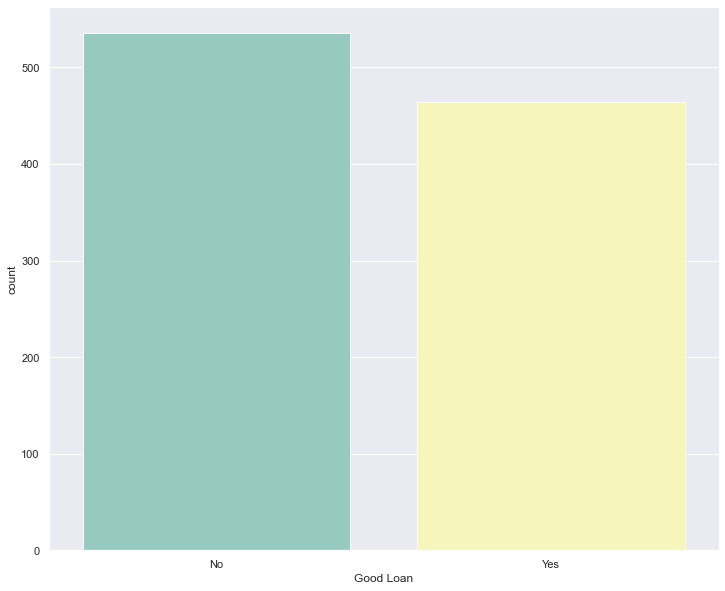

In [18]:
#distribution of Y
sns.countplot(x="Good Loan",data=raw_data, palette="Set3")

In [19]:
raw_data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

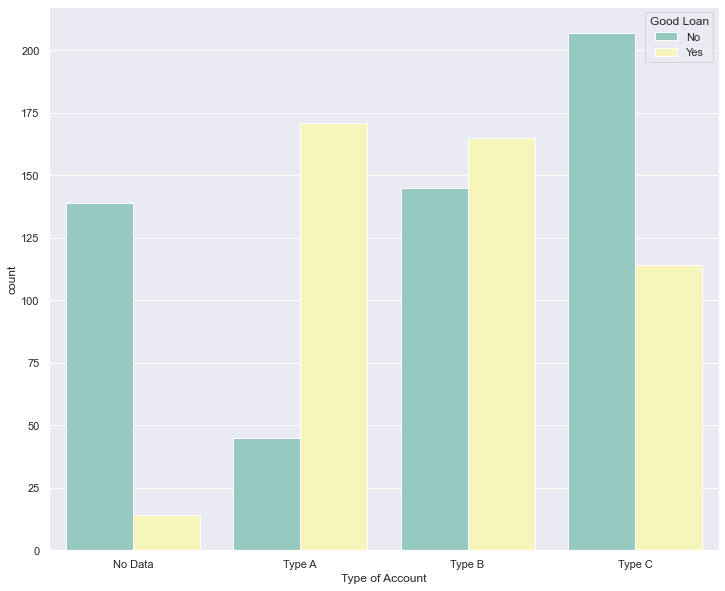

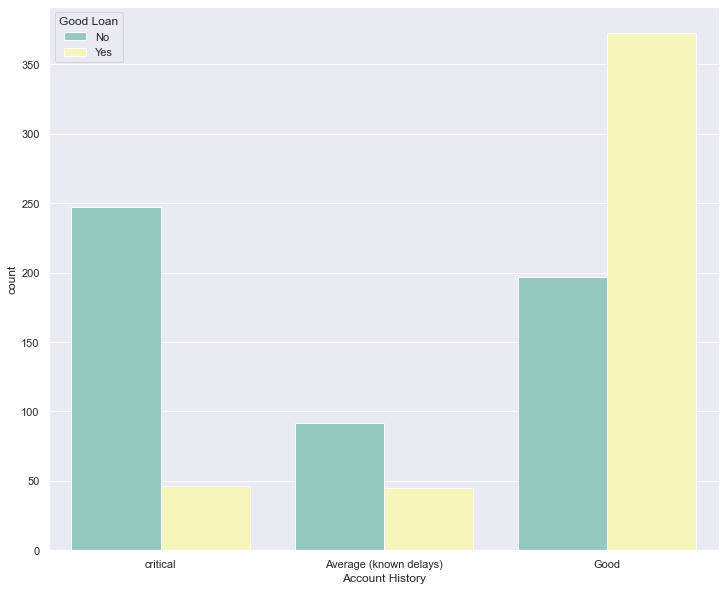

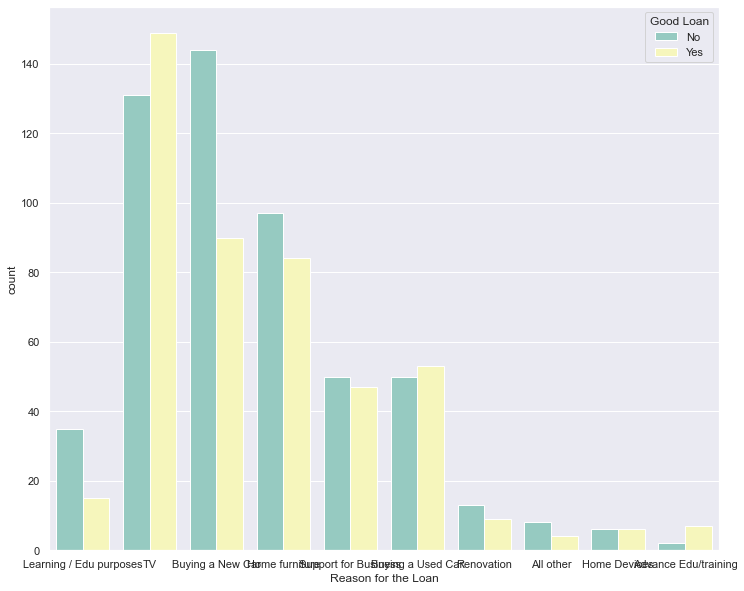

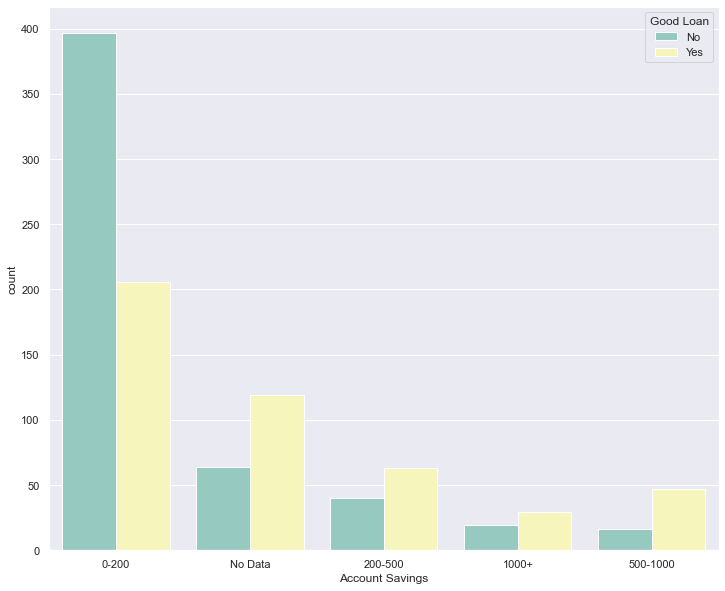

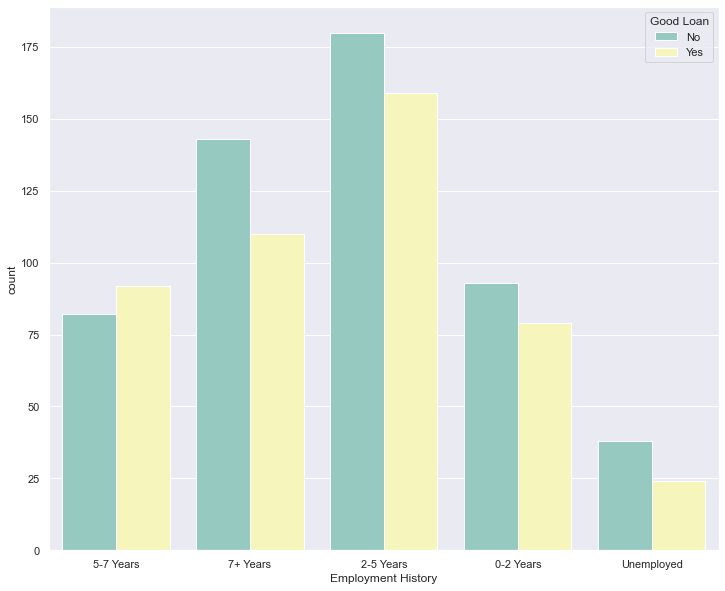

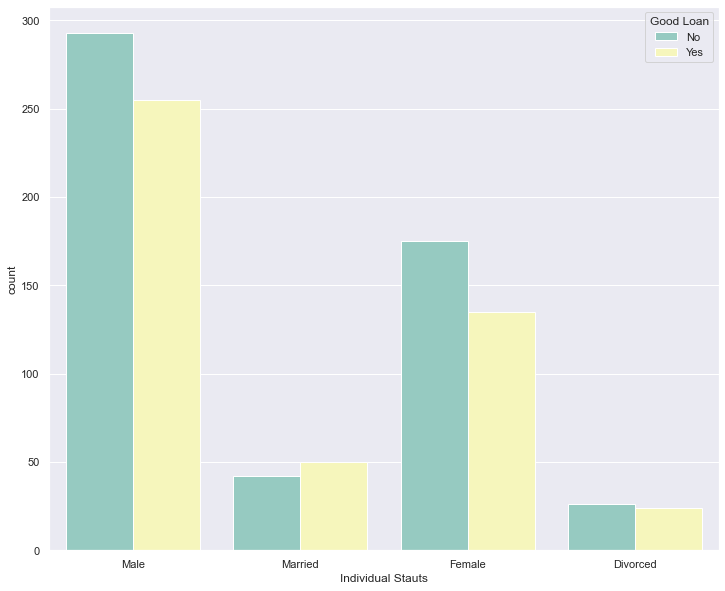

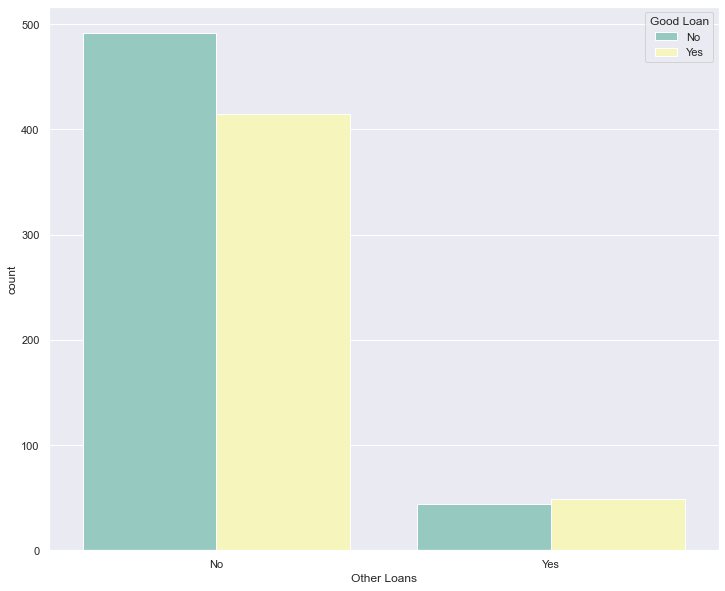

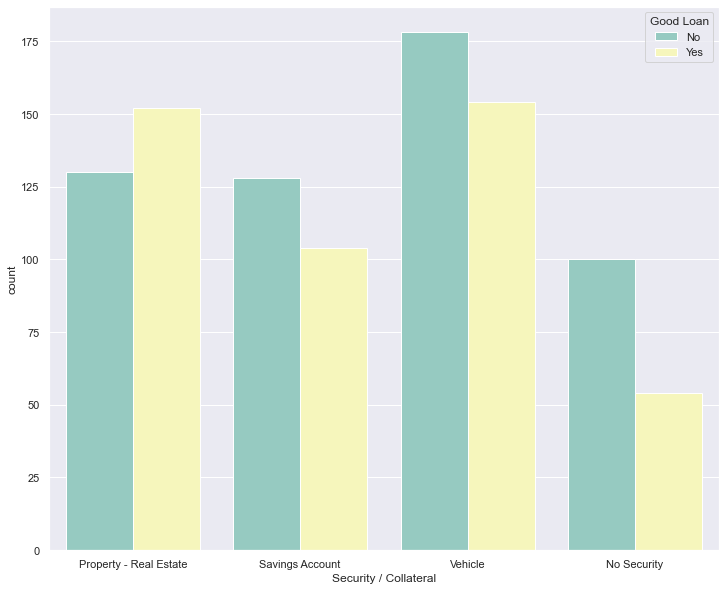

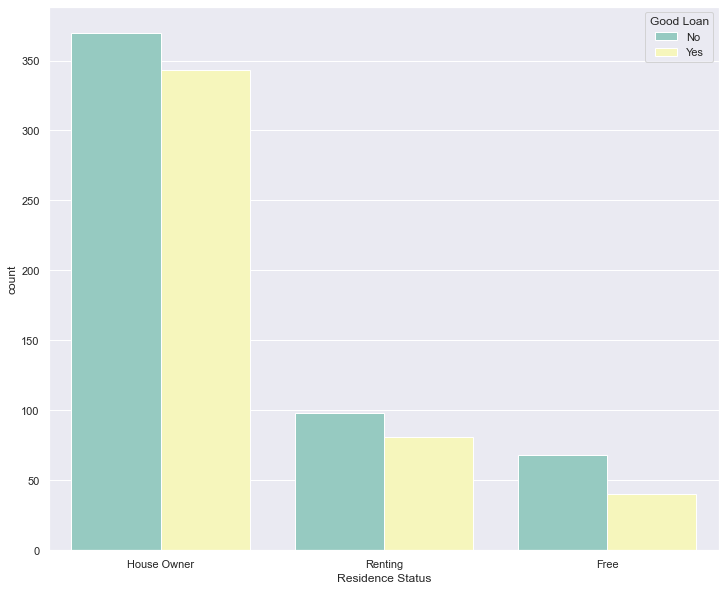

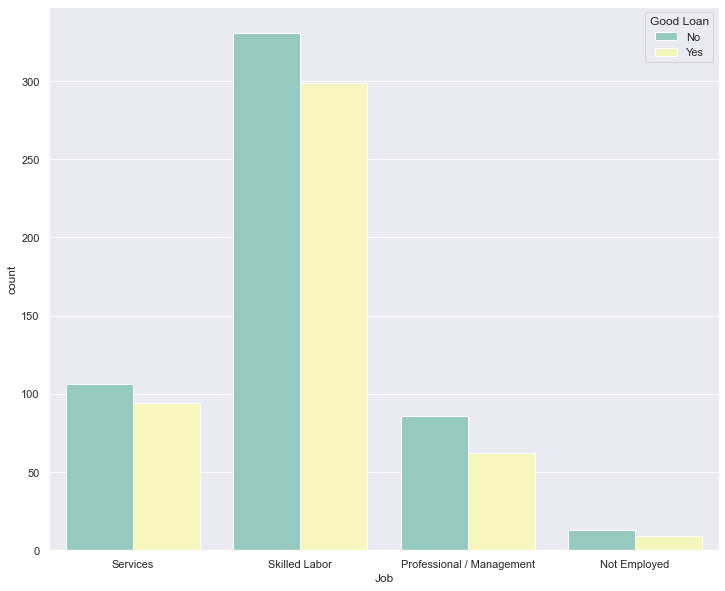

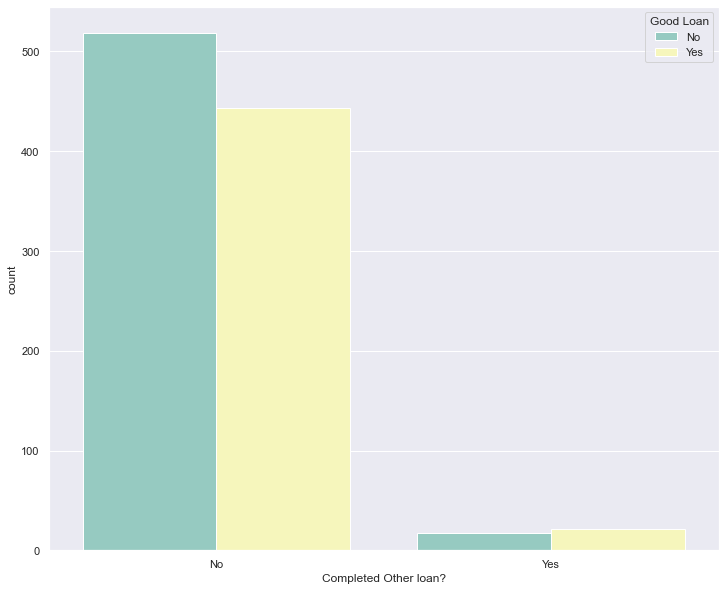

In [76]:
features=['Type of Account', 'Account History', 'Reason for the Loan', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x=f,data=raw_data, palette="Set3", hue="Good Loan")
    plt.show()

In [77]:
pd.get_dummies(raw_data,columns=['Type of Account'])

,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C
0,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No,1,0,0,0
1,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No,1,0,0,0
2,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No,1,0,0,0
3,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No,1,0,0,0
4,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Average (known delays),Buying a Used Car,3602.0,0-200,0-2 Years,Female,No,Savings Account,47.0,House Owner,Services,No,No,0,0,0,1
1000,Average (known delays),TV,4473.0,0-200,2-5 Years,Female,No,Property - Real Estate,35.0,House Owner,Skilled Labor,No,No,0,0,0,1
1001,Average (known delays),TV,12759.0,500-1000,5-7 Years,Male,No,Vehicle,38.0,House Owner,Professional / Management,No,Yes,0,0,0,1
1002,Average (known delays),Buying a New Car,2551.0,0-200,7+ Years,Male,No,Vehicle,47.0,House Owner,Services,No,No,0,0,0,1


In [78]:
new_raw_data=pd.get_dummies(raw_data,columns=features) # apply to all variables

In [79]:
# convert Y to 1 /0
new_raw_data["Good Loan"][new_raw_data["Good Loan"]=="Yes"]=1
new_raw_data["Good Loan"][new_raw_data["Good Loan"]=="No"]=0

/var/folders/4v/8s_st9ts6mb1xndxc2t5bsfw0000gn/T/ipykernel_13501/449066705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data["Good Loan"][new_raw_data["Good Loan"]=="Yes"]=1
/var/folders/4v/8s_st9ts6mb1xndxc2t5bsfw0000gn/T/ipykernel_13501/449066705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data["Good Loan"][new_raw_data["Good Loan"]=="No"]=0


In [80]:
new_raw_data # visualise the data

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [81]:
# split data
X=new_raw_data.drop("Good Loan",axis=1).values
y=new_raw_data["Good Loan"]
y=y.astype(int)
print(X.shape)
print(y.shape)


(1000, 48)
(1000,)


In [82]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [83]:
fi_col=[]
fi=[]

for i, column in enumerate(new_raw_data.drop("Good Loan",axis=1)):
    print("The feature importancefor {} is: {}".format(column, dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])         
    

The feature importancefor Loan Amount is: 0.12122079844891431
The feature importancefor Age is: 0.07962988068108864
The feature importancefor Type of Account_No Data is: 0.054236275712355064
The feature importancefor Type of Account_Type A is: 0.04973253970745607
The feature importancefor Type of Account_Type B is: 0.0
The feature importancefor Type of Account_Type C is: 0.026698167265803152
The feature importancefor Account History_Average (known delays) is: 0.0026219295620499047
The feature importancefor Account History_Good is: 0.19131616315491018
The feature importancefor Account History_critical is: 0.0
The feature importancefor Reason for the Loan_Advance Edu/training is: 0.0
The feature importancefor Reason for the Loan_All other is: 0.0
The feature importancefor Reason for the Loan_Buying a New Car is: 0.012188194319512301
The feature importancefor Reason for the Loan_Buying a Used Car is: 0.00657340597791024
The feature importancefor Reason for the Loan_Home Devices is: 0.0
Th

The feature importancefor Age is: 0.09002061903950247
The feature importancefor Type of Account_No Data is: 0.05204375041621946
The feature importancefor Type of Account_Type A is: 0.051871290522357415
The feature importancefor Type of Account_Type B is: 0.007645053805377638
The feature importancefor Type of Account_Type C is: 0.010392682774808
The feature importancefor Account History_Average (known delays) is: 0.0
The feature importancefor Account History_Good is: 0.18358212312787356
The feature importancefor Account History_critical is: 0.0
The feature importancefor Reason for the Loan_Advance Edu/training is: 0.0
The feature importancefor Reason for the Loan_All other is: 0.0
The feature importancefor Reason for the Loan_Buying a New Car is: 0.007391912828126166
The feature importancefor Reason for the Loan_Buying a Used Car is: 0.015132832879156675
The feature importancefor Reason for the Loan_Home Devices is: 0.0
The feature importancefor Reason for the Loan_Home furniture is: 0.

In [84]:
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


,Feature,Feature Importance
0,Loan Amount,0.121221
1,Age,0.079630
2,Type of Account_No Data,0.054236
3,Type of Account_Type A,0.049733
4,Type of Account_Type B,0.000000
5,Type of Account_Type C,0.026698
6,Account History_Average (known delays),0.002622
7,Account History_Good,0.191316
8,Account History_critical,0.000000
9,Reason for the Loan_Advance Edu/training,0.000000


In [85]:
fi_df.sort_values("Feature Importance",ascending = False).reset_index()

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


In [86]:
# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

columns_to_keep

0                                      Loan Amount
1                                              Age
2                          Type of Account_No Data
3                           Type of Account_Type A
4                           Type of Account_Type B
5                           Type of Account_Type C
6           Account History_Average (known delays)
7                             Account History_Good
8                         Account History_critical
9         Reason for the Loan_Advance Edu/training
10                   Reason for the Loan_All other
11            Reason for the Loan_Buying a New Car
12           Reason for the Loan_Buying a Used Car
13                Reason for the Loan_Home Devices
14              Reason for the Loan_Home furniture
15     Reason for the Loan_Learning / Edu purposes
16                  Reason for the Loan_Renovation
17        Reason for the Loan_Support for Business
18                          Reason for the Loan_TV
19                           Ac

In [88]:
print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

(1000, 49)
(1000, 40)


In [104]:
X=new_raw_data[columns_to_keep].values # make it array for ML model
Y=new_raw_data["Good Loan"]
Y=Y.astype('int')

In [105]:
print(X.shape)
print(Y.shape)

(1000, 40)
(1000,)


In [106]:
# Hold-out validation

# first one
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, train_size = 0.9, test_size=0.1, random_state=15)


print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(Y_train.shape)
print(Y_test.shape)
print(Y_valid.shape)

(720, 40)
(200, 40)
(80, 40)
(720,)
(200,)
(80,)


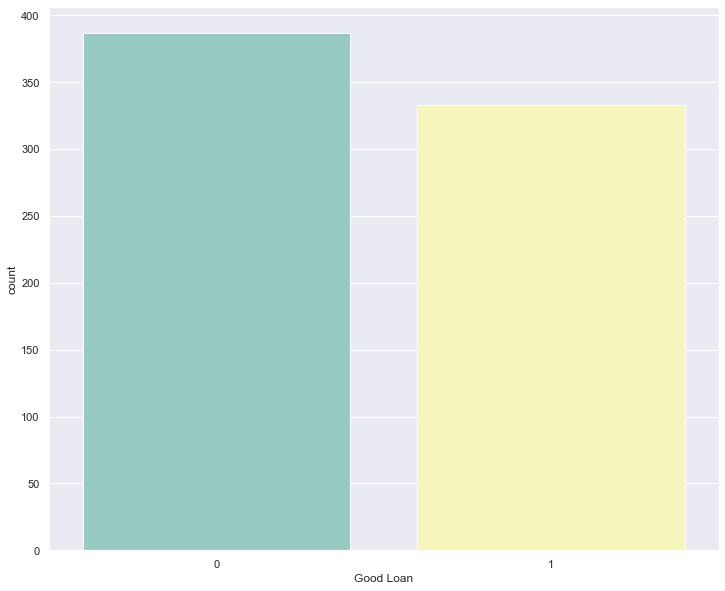

In [107]:
ax=sns.countplot(x=Y_train,palette="Set3")
# keep check Y_test, Y_valid. all good nearly nearly 50/50

In [108]:

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, Y_train)


/Users/ameliekong/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [109]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)


In [111]:
# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)
pred_proba

array([[0.592056, 0.407944],
       [0.906394, 0.093606],
       [0.392293, 0.607707],
       ...,
       [0.806322, 0.193678],
       [0.903901, 0.096099],
       [0.097241, 0.902759]])

In [114]:
log_reg.coef_
print(log_reg.coef_.shape)

(1, 40)


In [120]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, Y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, Y_test))


# Classification Report
print(classification_report(Y_train, y_pred))

The Training Accuracy is:  0.7791666666666667
The Testing Accuracy is:  0.79
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       387
           1       0.77      0.75      0.76       333

    accuracy                           0.78       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.78      0.78      0.78       720

